# DRFPMI frequency response* 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.signal as sig
import os
import ifo_configs as ifco
plt_style_dir = 'stash/'
if os.path.isdir(plt_style_dir) == True:
    plt.style.use(plt_style_dir + 'ppt2latexsubfig.mplstyle')

plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]

Up to this point we can understand how the FPMI repsonse function works:
$$ H_{FPMI}(\omega_g) = \frac{2 \Delta \phi_r(\omega_g)}{h(\omega_g)} =  \frac{t_1^2r_2}{(t_1^2 + r_1^2)r_2 -r_1} \frac{H_{\mathrm{MI}}(\omega_g, L)}{1-r_1r_2e^{-2i \omega_g L /c }}  $$

In [2]:
# Some parameters
cee = np.float64(299792458)
OMEG = np.float64(2*np.pi*cee/(1064.0*10-9))
L = np.float64(4000.0)
nu = np.arange(1, 1000000, 1)
nat_nu = [np.float64(i*2*np.pi) for i in nu]
h_0 = np.float64(1)

T_1 = .014
#T_1 = 25e-6 
T_2 = 50e-6
R_1 = 1-T_1
R_2 = 1-T_2

t_1 = T_1**.5
r_1 = R_1**.5
r_2 = R_2**.5 

PHI_0 = np.pi/2 
P_IN = 125

# POWER RECYCLING

## Derivation
With all the power going to the symmetric port, the nominal operating state of the FPMI involves a significant amount of dumped / wasted power. Placing a mirror at the symmetric port can allow that power to be recycled. Though considerations must be made to maximize the amount of recycling gain you can acquire with your GW detector. This is dependent on the placement of the power recycling mirror (PRM) and its  reflectivity, transmission, and loss coefficients. 

But first, the field at the symmetric port:

$$E_\mathrm{SYM} = \frac{E_i}{2}e^{2ikl}(r_\mathrm{FP,X} + r_\mathrm{FP,Y}) $$

This is realized through observing the circulating power between the PRM and the short Michelson:

$$ E_\mathrm{PRC} = \frac{t_\mathrm{PRM}}{1- r_\mathrm{PRM} r_\mathrm{FPMI} e^{2ik (L_\mathrm{PRC2BS} + L_\mathrm{SMICH})}}E_\mathrm{in} $$ 

Where:

$$ L_\mathrm{SMICH} = l_x + l_y $$ 



Now let's observe the cavity reflection parameter:

$$ r_\mathrm{FP} = -r_1 + \frac{t_1^2 r_2 e^{i2kL}}{1-r_1 r_2 e^{i2kL}} = -\frac{\mathcal{F}}{\pi} \Big[-\Big(\frac{r_1}{r_2} \Big)^{1/2} + \Big(\frac{r_2}{r_1}\Big)^{1/2} (r_1^2 + t_1^2) \Big]$$


But with loss considerations:

$$ r_\mathrm{FP} = -r_1 + \frac{t_1^2 r_2 e^{- t_\mathrm{RT}/\tau_\mathrm{loss}}  e^{i2kL}}{1-r_1 r_2 e^{- t_\mathrm{RT}/\tau_\mathrm{loss}} e^{i2kL}} \approx -\frac{\mathcal{F}}{\pi} \Big[\frac{-r_1 +  r_2(r_1^2 + t_1^2)(1-\mathscr{L}_\mathrm{RT})}{\sqrt{r_1 r_2}} \Big]$$


we know that $t_1^2 << r_1^2$: 

$$r_\mathrm{FP} \approx -\frac{\mathcal{F}}{\pi} \Big[ \frac{r_1(-1 + (1 - \pi/\mathcal{F}) (1- \mathscr{L}_\mathrm{RT}))}{\sqrt{r_1 r_2}} \Big] \approx  -\Big(\frac{r_1}{r_2}\Big)^{1/2} \frac{\mathcal{F}}{\pi} \Big[- \pi/\mathcal{F} - \mathscr{L}_\mathrm{RT} + (\mathscr{L}_\mathrm{RT}\pi)/\mathcal{F}) \Big] $$

And $\mathscr{L}_\mathrm{RT} <<1$ with $r_1 /r_2 \approx 1$ we get:

$$r_\mathrm{FP} \approx -1 + \frac{\mathcal{F}}{\pi} \mathscr{L}_\mathrm{RT}$$

If we're operating at a dark fringe, at the symmetric port we see superimposed fields:

$$ E_\mathrm{SYM}  = \frac{E_i}{2} \Big[ r_\mathrm{FPX}e^{2ik\mathscr{l}_x} + r_\mathrm{FPY}e^{2ik\mathscr{l}_y} \Big] $$

Where we assume that the short Michelson arms and reflection coefficients are roughly equal ($\mathscr{l}_x = \mathscr{l}_y$, $r_\mathrm{FPX} = r_\mathrm{FPY}$)

We also can average the short Michelson arm lengths $(\mathscr{l}_x + \mathscr{l}_y)/2$ such that the effective reflection coefficient is:
$r_\mathrm{FPMI} = e^{2ik\mathscr{l}}(- 1 + \frac{\mathcal{F}}{\pi} \mathscr{L}_\mathrm{RT})$

Knowing this we create the following expression for the circulating power within the cavity:

$$ P_\mathrm{PRC} = \frac{|t_\mathrm{PRM}|^2}{|1-r_\mathrm{PRM} r_\mathrm{FPMI} e^{2ik(L_\mathrm{PRC2BS} + L_\mathrm{SMICH})}|^2} P_\mathrm{in}$$

where $|t_\mathrm{PRM}|^2 = 1 - |r_\mathrm{PRM}|^2 $ and given a carrier resonance condition we want to maximize the power with a variable PRM reflectivity:

$$\frac{\partial P_\mathrm{PRC}}{\partial r_\mathrm{PRM}} = \frac{2r_\mathrm{PRM}^2(r_\mathrm{FPMI} - r_\mathrm{PRM})}{(1 - r_\mathrm{PRM} r_\mathrm{FPMI})^3} = 0$$

which sets $ r_\mathrm{PRM} = r_\mathrm{FPMI} $ 

On resonance, the power recyling gain ($G_\mathrm{PR} = \frac{P_\mathrm{PRC}}{P_\mathrm{in}}$):

$$ G_\mathrm{PR} = \frac{\pi}{2 \mathcal{F} \mathscr{L}_\mathrm{RT}} \Bigg[ \frac{1}{1- \frac{\mathcal{F}\mathscr{L}_\mathrm{RT}}{2 \pi}} \Bigg] $$

In [3]:
r_FPMI = -r_1 + (T_1*r_2)/(1-r_1*r_2)
r_PRM = r_FPMI
G_PRC = 1/(1-r_PRM*(r_FPMI))

In [4]:
L_rt = 75e-6
Finn = (np.pi*np.sqrt(r_1*r_2))/(1-r_1*r_2)
print(Finn)

444.0741558169753


In [5]:
r_FPMI_approx = (1 - Finn*L_rt/np.pi)

In [6]:
r_range = np.arange(.9,1,1/(2**16))

In [7]:
G_PRC_ = (1-(r_range)**2)/(1-r_range*(r_FPMI_approx))**2

In [8]:
ifco.PRG?

Signature: ifco.PRG(L_rt, Finn)
Docstring:
POWER RECYCLING GAIN (@ optimal reflectivity)
* Assuming a FPMI with symmetric arms *
L_rt : Round trip loss
Finn : Cavity finesse
File:      ~/Documents/git/SU/dissertation/code/ifo_configs.py
Type:      function


In [9]:
G_PRC_opt =  ifco.PRG(L_rt, Finn)

Text(0, 0.5, '$\\mathdefault{G_{PRC}}$ [arb]')

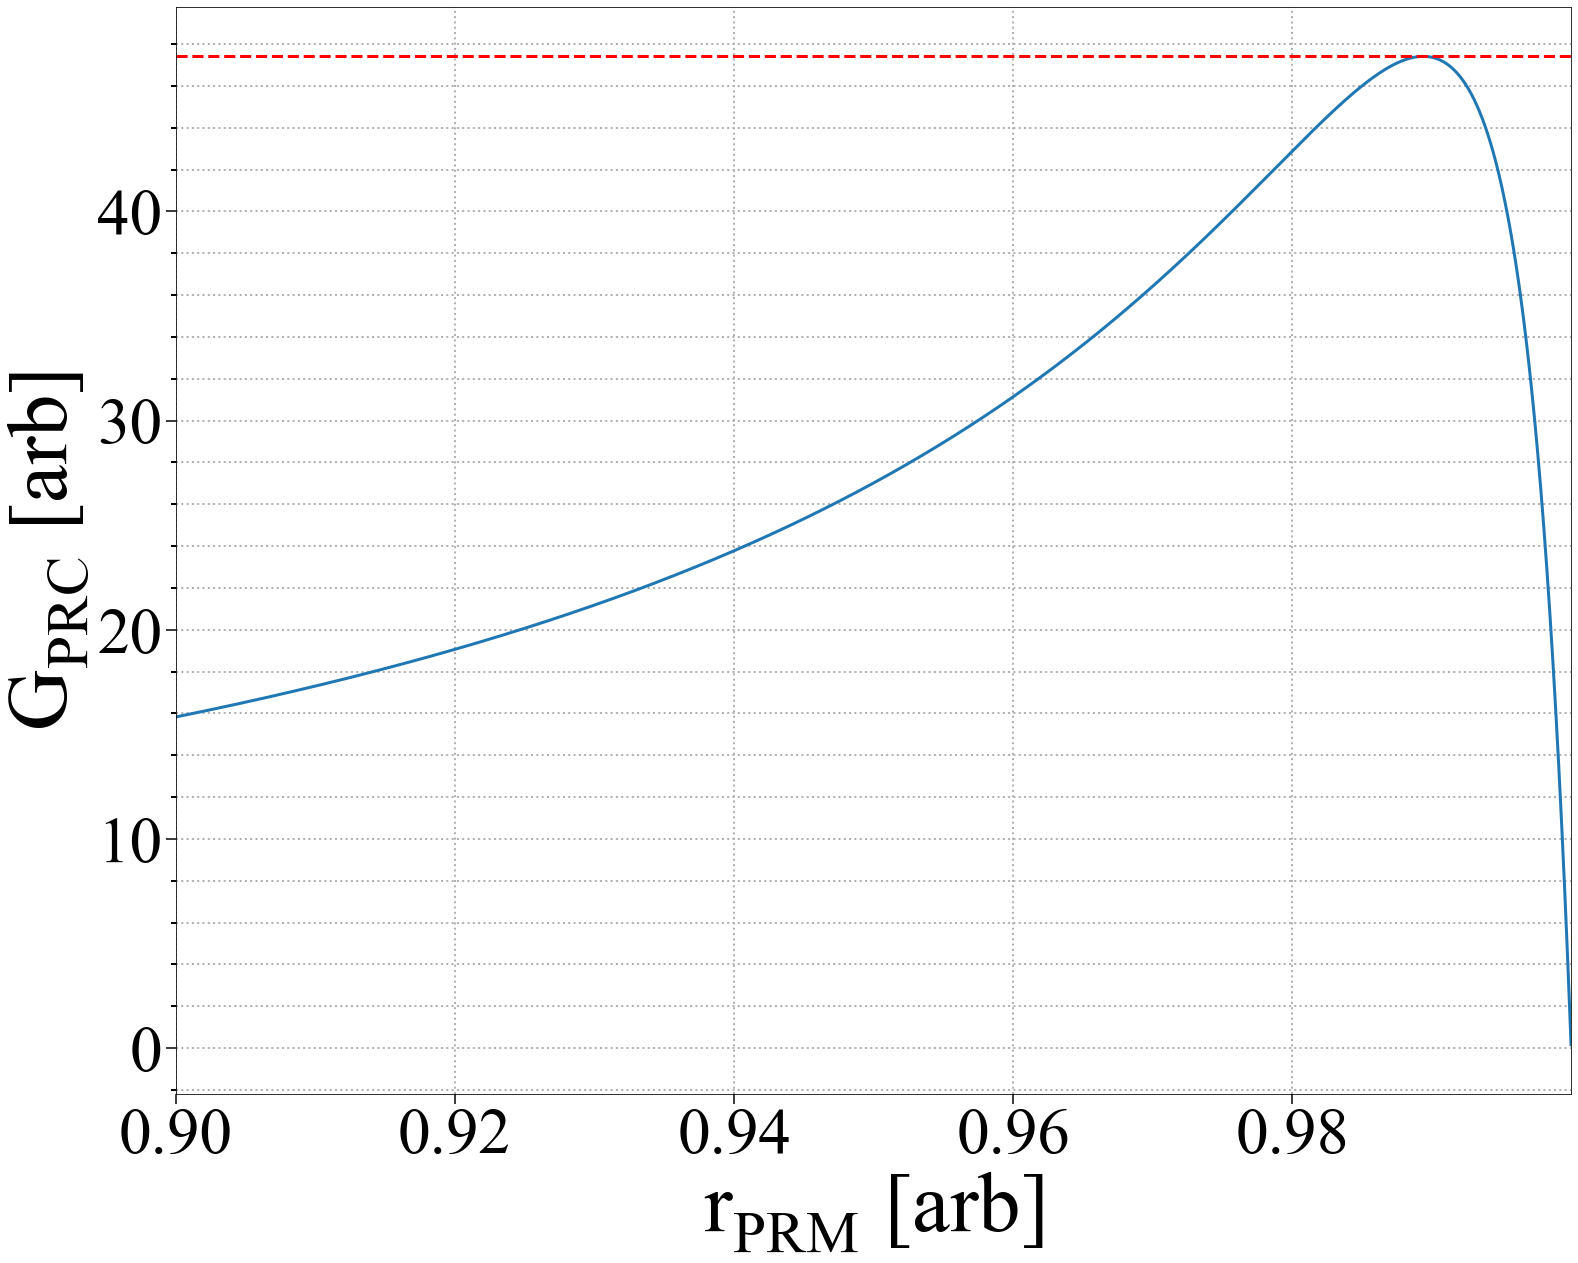

In [10]:
plt.plot(r_range, G_PRC_)
plt.axhline(G_PRC_opt, linestyle='--', color='r')
plt.xlim(r_range[0], r_range[-1])
plt.xlabel('$\mathdefault{r_{PRM}}$ [arb]')
plt.ylabel('$\mathdefault{G_{PRC}}$ [arb]')


In [11]:
ifco.fpmi_freq_resp?

Signature:
ifco.fpmi_freq_resp(
    freq,
    r_1,
    t_1,
    r_2,
    L,
    phi_0,
    P_in,
    OMEGA,
    low_pass=False,
)
Docstring:
FABRY PEROT MICHELSON FREQUENCY RESPONSE CALCULATOR
freq : standard (gravitational wave) frequency [Hz]
r_1, t_1, r_2: Assuming arm symmetry where the ITM has r_1, t_1 coefficients and the ETM has a r_2 reflectivity coefficient. Also assumes no loss. [arb]
OMEGA: OPTICAL angular frequency [rad Hz]
Length: Michelson ifo arm length [m]
phi_0 : static differential arm length tuning phase [rad]
File:      ~/Documents/git/SU/dissertation/code/ifo_configs.py
Type:      function


In [12]:
H_FPMI = ifco.fpmi_freq_resp(nu, r_1, t_1, r_2, L, PHI_0, P_IN, OMEG)
H_FPMI_LP = ifco.fpmi_freq_resp(nu, r_1, t_1, r_2, L, PHI_0, P_IN, OMEG, low_pass='True')

In [13]:
H_PRFPMI = np.sqrt(G_PRC_opt)*H_FPMI

We estimate the FP's pole frequency
$$  1 - r_1 r_2 e^{-2i \omega_g L / c} = 0 $$
therefore when:
$$ e^{-i \omega_g L / c} = \frac{1}{\sqrt{r_1 r_2}} $$
we acquire the pole frequency $\omega_\mathrm{pole}$ as indicated in the low pass
$$ f_\mathrm{pole} = \frac{1}{4\pi \tau_{s}} =  \frac{c}{4 \pi L} \frac{1- r_1 r_2}{\sqrt{r_1 r_2}} = \frac{\nu_\mathrm{FSR}}{2 \pi} \frac{1- r_1 r_2}{\sqrt{r_1 r_2}} = \frac{\nu_\mathrm{FSR}}{\mathcal{F}} $$

In [14]:
ifco.mich_freq_resp?

Signature: ifco.mich_freq_resp(freq, Length, phi_0, P_in, OMEGA)
Docstring:
MICHELSON FREQEUNCY RESPONSE CALCULATOR
freq : standard (gravitational wave) frequency [Hz]
Length : Michelson ifo arm length [m]
phi_0 : static differential arm length tuning phase [rad]
P_in : input power [W] 
File:      ~/Documents/git/SU/dissertation/code/ifo_configs.py
Type:      function


Might as well compare it to our Michelson response: 
$$ H_{\mathrm{MI}}(\omega_g) = \frac{2 L \Omega}{c}e^{-i L \omega / c} \frac{\mathrm{sin}(L \omega /c)}{L \omega /c} $$

In [15]:
H_MI = ifco.mich_freq_resp(nu, L, OMEG, P_IN, OMEG)

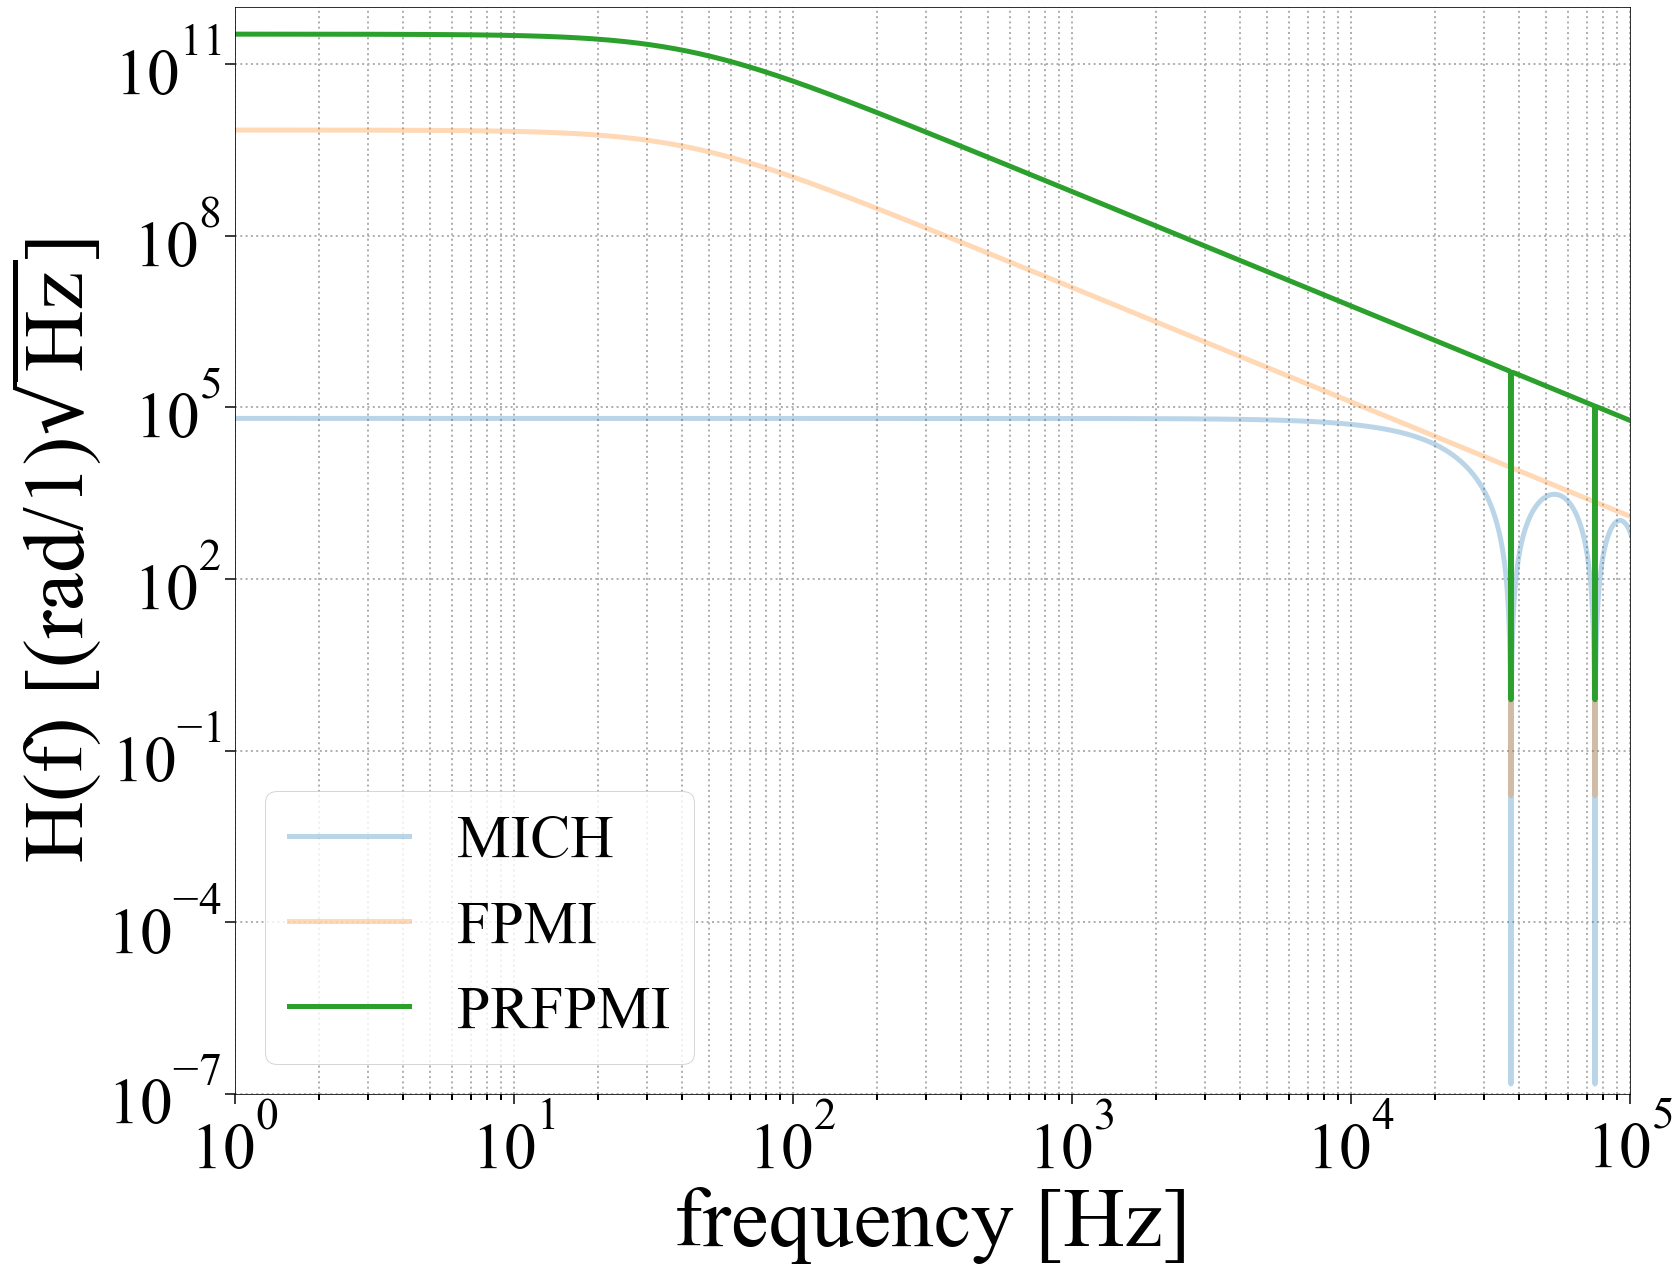

In [18]:
plt.loglog(nu, ifco.bode_amp(H_MI), label= 'MICH', linewidth= 5.0, alpha=.3)
plt.loglog(nu, ifco.bode_amp(H_FPMI), label='FPMI', linewidth=5.0, alpha=.3)
plt.loglog(nu, ifco.bode_amp(H_PRFPMI), label='PRFPMI', linewidth = 5.0)
#plt.axvline (x=f_pole,ymin=1e-11, color='red', linestyle='dotted', linewidth=3)
plt.xlim([1e0, 1e5])
plt.ylim([1e-7,1e12])
plt.xlabel('frequency [Hz]')
plt.ylabel('H(f) [$\mathdefault{(rad/1)\sqrt{Hz}}$]')
lgd=plt.legend()
plt.savefig('../figs/INTRO/prfpmi_fr.pdf', dpi=300, bbox_inches='tight')

Text(0.5, 0, 'Frequency [Hz]')

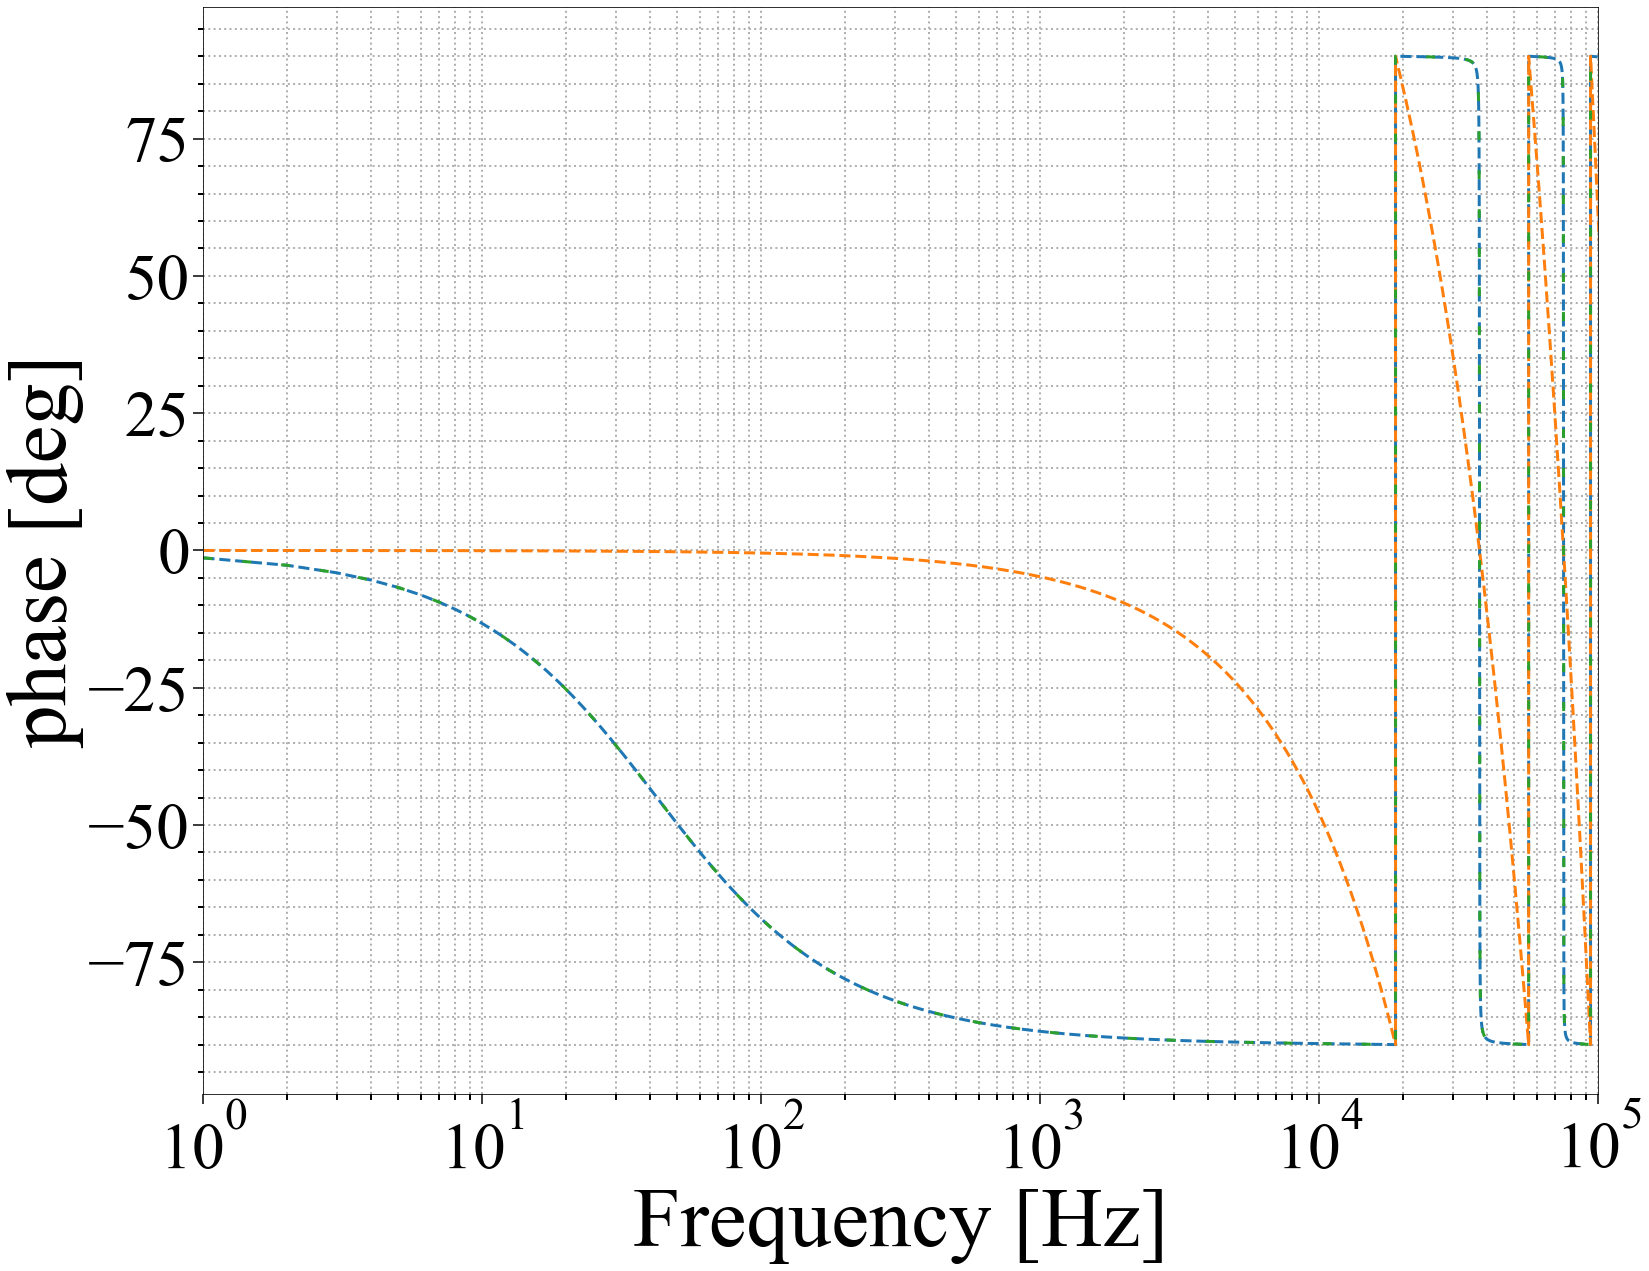

In [19]:
plt.semilogx(nu,(180/np.pi)*np.arctan(np.imag(H_FPMI)/np.real(H_FPMI)),'--')
plt.semilogx(nu,(180/np.pi)*np.arctan(np.imag(H_MI)/np.real(H_MI)), '--')
plt.semilogx(nu,(180/np.pi)*np.arctan(np.imag(H_PRFPMI)/np.real(H_PRFPMI)),linestyle='--', linewidth=3.0,dashes=(3,10))
plt.xlim([1,100000])
plt.ylabel('phase [deg]')
plt.xlabel('Frequency [Hz]')

# SIGNAL RECYCLING

Initially not used in early iterations of LIGO (intial LIGO and enhanced LIGO) signal recycling imagines using a partially reflective mirror at the anti-symmetric port. And at first glance it seems to not very much make sense to have a mirror at detector output as you would potentially attenuate gravitational wave signals by said mirror reflection coefficient. 

While true, it is important to analyze the multi-state configurations offered by such a mirror with various microscopic length tuning configurations. What do I mean by this? Well, it helps to start imagining by analogy of couple cavity relationship as established in the power recycling discussion. The relationship of the differential signal output of the PRFPMI with respect to the newly placed mirror at the anti-symmetric port is represented by the following:


$$ t_\mathrm{SRC} = \frac{t_\mathrm{arms}t_\mathrm{SRM} e^{i  (k + \Omega/c) \mathscr{l}_\mathrm{SRC}}}{1- r_\mathrm{arms}r_\mathrm{SRM} e^{2i  (k + \Omega/c) \mathscr{l}_\mathrm{SRC}}}$$

$$ r_\mathrm{SRC} = \frac{r_\mathrm{arms} - r_\mathrm{SRM} e^{2i  (k + \Omega/c) l_\mathrm{SRC}}}{1- r_\mathrm{arms}r_\mathrm{SRM} e^{2i  (k + \Omega/c) \mathscr{l}_\mathrm{SRC}}}$$

as $k >> \Omega_\mathrm{gw}/c$ for $ 1 < \Omega_\mathrm{gw} < 5 \cdot 10^3 $

Therefore with a pre-defined $T_\mathrm{arms} + R_\mathrm{arms} + L_\mathrm{arms} = 1$ the coupled cavity pole AND gain is a function of the SRM reflectivity and microscopic length tuning:

$$ t_\mathrm{SRC} = \frac{t_\mathrm{arms}t_\mathrm{SRM} e^{i k \mathscr{l}_\mathrm{SRC}}}{1- r_\mathrm{arms}r_\mathrm{SRM} e^{2i k \mathscr{l}_\mathrm{SRC}}}$$

$$ r_\mathrm{SRC} = \frac{r_\mathrm{arms} - r_\mathrm{SRM} e^{2i k l_\mathrm{SRC}}}{1- r_\mathrm{arms}r_\mathrm{SRM} e^{2i k \mathscr{l}_\mathrm{SRC}}}$$


We now observe the tuning extrema:
- On resonance $2ik \mathscr{l}_\mathrm{SRC} = 2i\phi_\mathrm{SRC} = 0$:
    $$ r_\mathrm{SRC} = \frac{r_\mathrm{arms} - r_\mathrm{SRM}}{1- r_\mathrm{arms}r_\mathrm{SRM}}$$
- On resonance $2ik \mathscr{l}_\mathrm{SRC} = 2i\phi_\mathrm{SRC} = \pi$:
$$ r_\mathrm{SRC} = \frac{r_\mathrm{arms} + r_\mathrm{SRM}}{1+ r_\mathrm{arms}r_\mathrm{SRM}}$$

In [20]:
ifco.drfpmi_freq_resp?

Signature:
ifco.drfpmi_freq_resp(
    freq,
    G_PRC_opt,
    r_1,
    t_1,
    r_2,
    r_SRM,
    t_SRM,
    L,
    P_in,
    OMEGA,
)
Docstring:
DUAL RECYCLED FABRY PEROT MICHELSON FREQUENCY RESPONSE CALCULATOR
freq: standard (gravitational wave) frequency [Hz]
G_PRC_opt: maximum power recycling gain (optimal) [arb]
r_1: ITM reflection coefficient [arb]
t_1: ITM transmission coefficient [arb]
r_2: ETM reflection coefficient [arb]
r_SRM: Signal recycling mirror reflection coefficient [arb]
t_SRM: Signal recycling mirror transmission coefficient [arb]
L: Length of the Fabry-Perot arms [m]
OMEGA: OPTICAL angular frequency [rad Hz]
File:      ~/Documents/git/SU/dissertation/code/ifo_configs.py
Type:      function


In [21]:
l_SRC = 56  #[m]

T_SRM = .30
R_SRM = 1-T_SRM
t_SRM = T_SRM**.5
r_SRM = R_SRM**.5

In [22]:
H_DRFPMI = ifco.drfpmi_freq_resp(nu, G_PRC_opt, r_1, t_1, r_2, r_SRM, t_SRM, L, P_IN, OMEG)

In [39]:
bode_test=False
if bode_test:
    fig, ax1 = plt.subplots()
    ax1.set_xlabel('frequency [Hz]')
    ax1.set_ylabel('H$_\mathdefault{FPMI}$  [$\mathdefault{(rad / 1) / \sqrt{Hz}}$]  ', color='C0')
    #ax1.plot(w/(FSR), F_w_cc_modsq*100)
    ax1.loglog(nu, ifco.bode_amp(H_FPMI), label='FPMI', linewidth=7.5, linestyle=':',color='C0')
    ax1.loglog(nu, ifco.bode_amp(H_PRFPMI), label='PRFPMI',  linewidth=7.5, color='C0')
    ax1.loglog(nu, ifco.bode_amp(H_DRFPMI), label='DRFPMI',  linewidth=7.5, color='C1')
    ax1.legend()
    #ax1.loglog(w,H_MI_modsq, label= 'MICH', linewidth= 5)
    #ax1.loglog(w,H_FPMI_LP_modsq*H_FPMI_modsq[0], label='FPMI LP', linewidth = 20.0, alpha=0.25,color='C2')
    #ax1.axvline (x=f_pole,ymin=1e-13, color='red', linestyle='dotted', linewidth=3)
    ax2 = ax1.twinx()
    ax2.semilogx(nu, ifco.bode_ph(H_FPMI),'--', linewidth=7.5, color='C0', alpha=.3)
    ax2.semilogx(nu, ifco.bode_ph(H_DRFPMI),'--', linewidth=7.5, color='C1', alpha=.3)
    ax2.grid(b=False, which='both', axis='y')
    #ax2.semilogx(w,(180/np.pi)*np.arctan(np.imag(H_MI)/np.real(H_MI)), '--')
    #ax2.semilogx(w,(180/np.pi)*np.arctan(np.imag(H_FPMI_LP)/np.real(H_FPMI_LP)),linestyle='--', linewidth=20.0,dashes=(4,10),alpha=.25, color='C2')
    plt.xlim([1,1e5])
    plt.ylabel('phase [deg]', color='C1', alpha=.5)

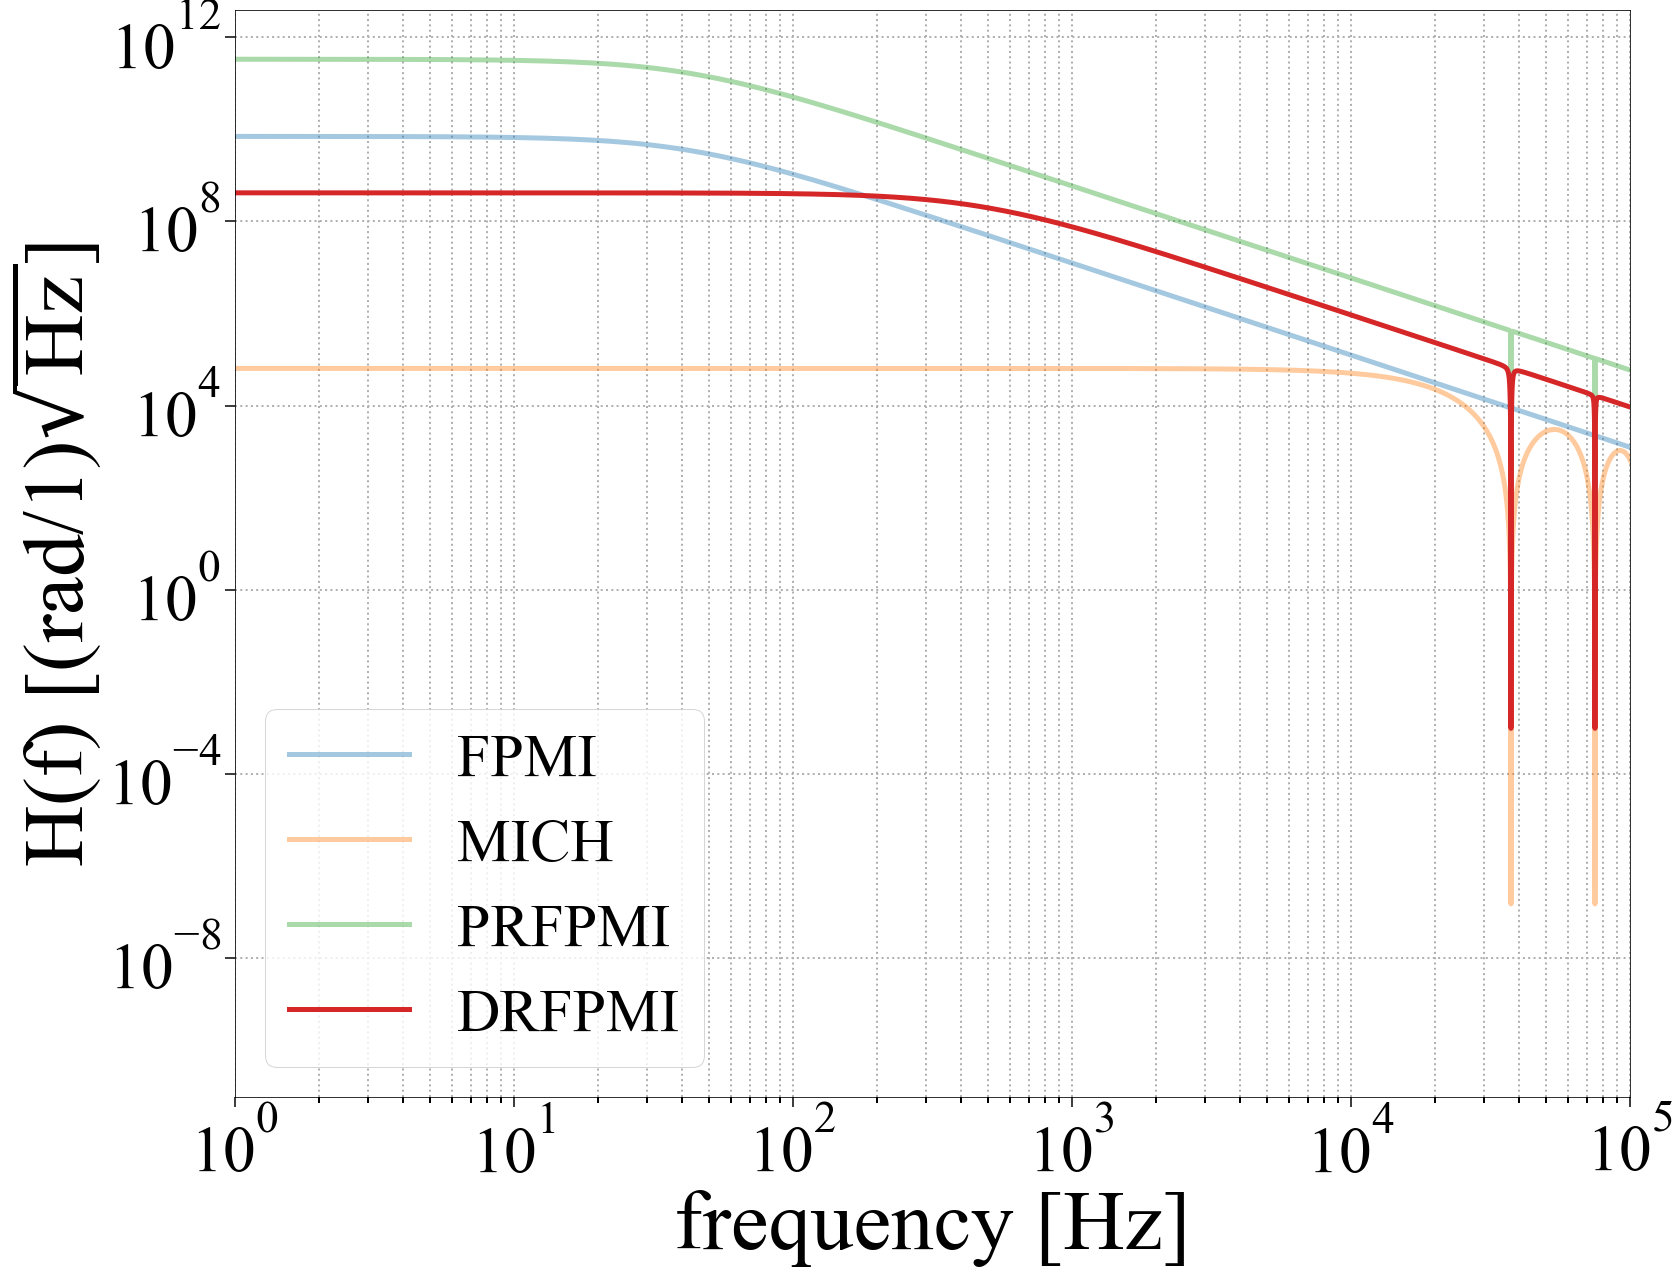

In [31]:
plt.loglog(nu, ifco.bode_amp(H_FPMI), label='FPMI', linewidth=5.0, alpha=.4)
plt.loglog(nu, ifco.bode_amp(H_MI), label= 'MICH', linewidth= 5.0, alpha=.4)
plt.loglog(nu, ifco.bode_amp(H_PRFPMI), label='PRFPMI', linewidth = 5.0, alpha=.4)
plt.loglog(nu, ifco.bode_amp(H_DRFPMI), label='DRFPMI', linewidth = 5.0)
#plt.axvline (x=f_pole,ymin=1e-11, color='red', linestyle='dotted', linewidth=3)
plt.xlim([1e0, 1e5])
plt.xlabel('frequency [Hz]')
plt.ylabel('H(f) [$\mathdefault{(rad/1)\sqrt{Hz}}$]')
lgd=plt.legend()
plt.savefig('../figs/INTRO/drfpmi_fr.pdf', dpi=300, bbox_inches='tight')

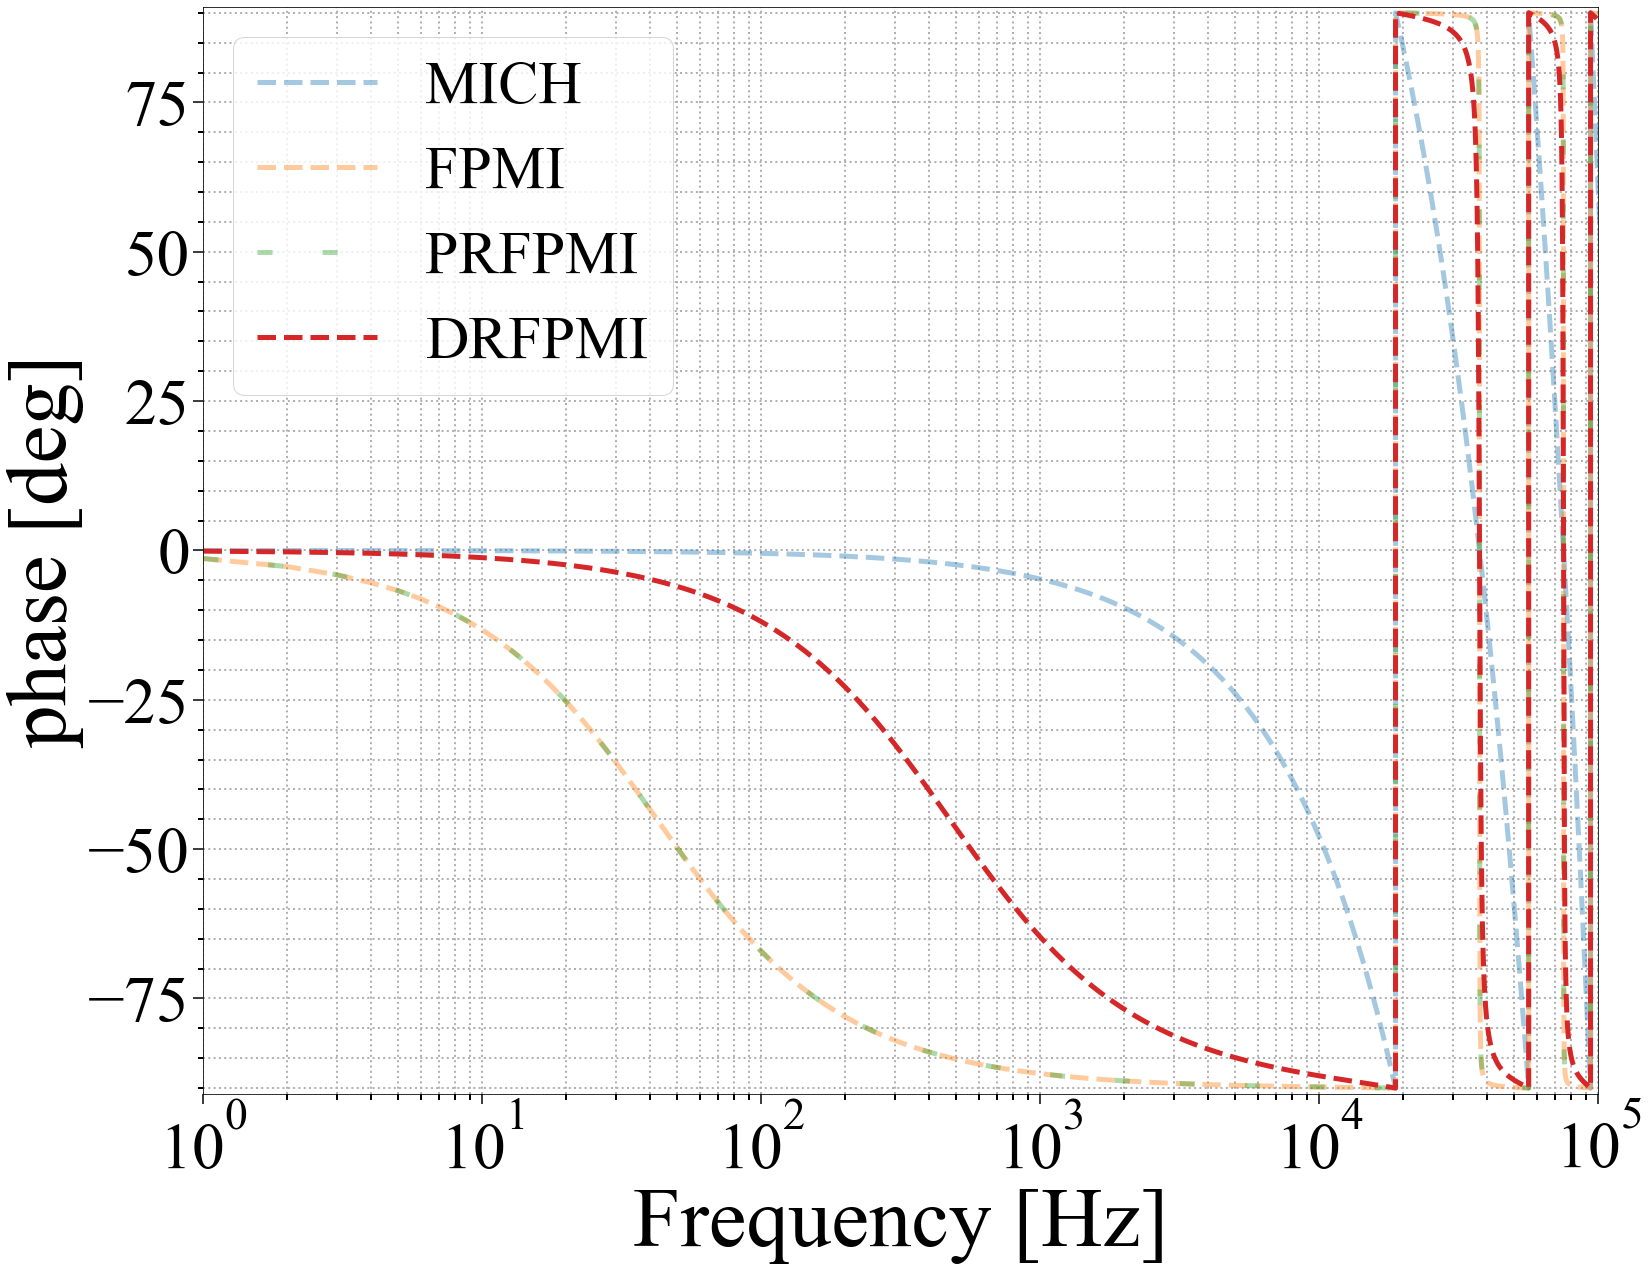

In [38]:
plt.semilogx(nu,ifco.bode_ph(H_MI), '--', linewidth=5.0, alpha=.4, label='MICH')
plt.semilogx(nu,ifco.bode_ph(H_FPMI),'--', linewidth=5.0, alpha=.4, label='FPMI')
plt.semilogx(nu,ifco.bode_ph(H_PRFPMI),linestyle='--', linewidth=5.0,dashes=(3,10), alpha=.4, label='PRFPMI')
plt.semilogx(nu,ifco.bode_ph(H_DRFPMI),'--', linewidth=5.0, label='DRFPMI')
plt.xlim([1,100000])
plt.ylim([-91,91])
plt.ylabel('phase [deg]')
plt.xlabel('Frequency [Hz]')
plt.legend()

In [26]:
ifco.N_shot?

Signature: ifco.N_shot(OMEGA, Length, phi_0, P_in)
Docstring:
Interferometer shot noise calculator
OMEG: OPTICAL angular frequency [rad Hz]
Length : ifo arm length [m]
phi_0 : static differential arm length tuning phase [rad]
P_in : Input power [W]
File:      ~/Documents/git/SU/dissertation/code/ifo_configs.py
Type:      function


In [27]:
Sn = ifco.N_shot(OMEG, L, PHI_0, P_IN)

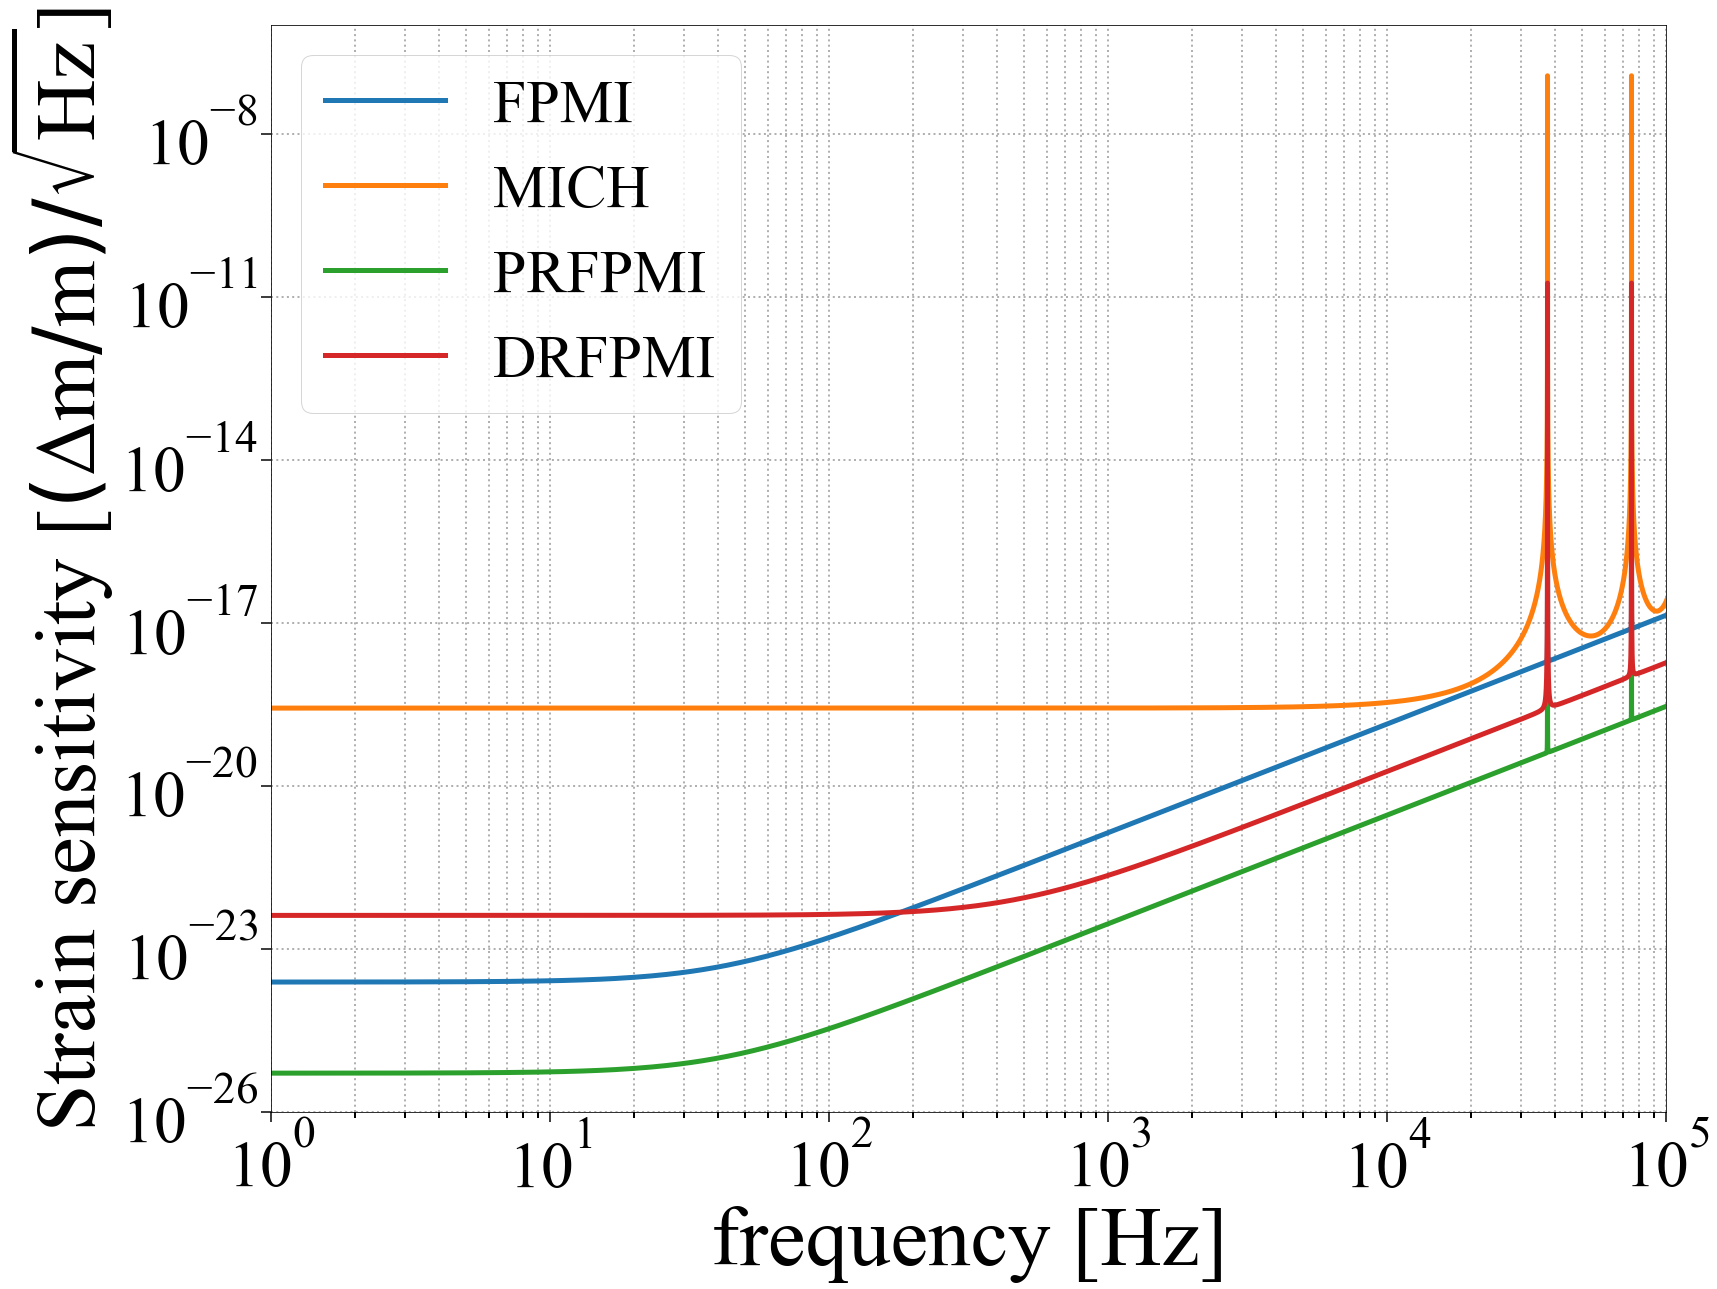

In [29]:
plt.loglog(nu, Sn/ifco.bode_amp(H_FPMI), label='FPMI', linewidth=5.0)
plt.loglog(nu, Sn/ifco.bode_amp(H_MI), label= 'MICH', linewidth= 5.0)
plt.loglog(nu, Sn/ifco.bode_amp(H_PRFPMI), label='PRFPMI', linewidth = 5.0)
plt.loglog(nu, Sn/ifco.bode_amp(H_DRFPMI), label='DRFPMI', linewidth = 5.0)
#plt.axvline (x=f_pole,ymin=1e-11, color='red', linestyle='dotted', linewidth=3)
plt.ylim([1e-26,1e-6])
plt.xlim([1e0, 1e5])
plt.xlabel('frequency [Hz]')
plt.ylabel('Strain sensitivity [$(\mathdefault{\Delta m} / \mathdefault{m}) / \sqrt{\mathdefault{Hz}}}$]')
lgd=plt.legend()
plt.savefig('../figs/INTRO/strain_compare.pdf', dpi=300, bbox_inches='tight')